In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Read the data

In [5]:

# Use a raw string by prefixing 'r' to the path
file_path = r'C:\Users\Rashmi\Desktop\Reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [6]:
print(df.shape)
# shows how many reviews (records) are there and how many columns exist

(568454, 10)


In [7]:
df.head(10)
# 10 sample products

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<BarContainer object of 5 artists>

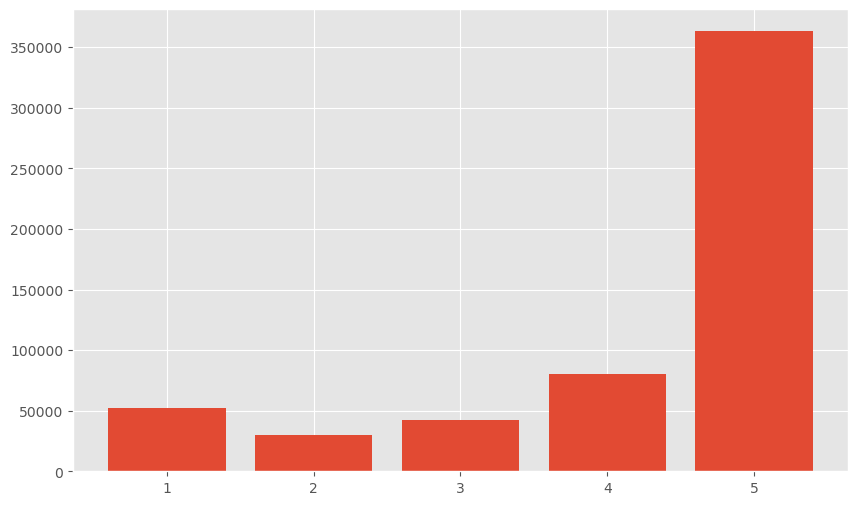

In [8]:
reviews = df['Score'].value_counts().sort_index()

# Creating a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(reviews.index,reviews.values)

# get a basic idea of how objects are rated out of 5.
# Here we find out that majority customers give 5 star 

In [9]:
example = df['Text'][50]
print(example)
tokens = nltk.word_tokenize(example)
print(tokens[:10])

# convert the entire text into individual tokens (every word is a split) to make it easier to perform operations

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']


In [10]:
tagged = nltk.pos_tag(tokens)
tagged
#pos_tag = part of speech. Every word is converted into its part of speech like NN is singular noin and so on

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
# group the tokenized words into chunks of similar nature
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER (Valence Aware Dictionary and sEntiment Reasoner).
 
VADER, which stands for Valence Aware Dictionary and sEntiment Reasoner, is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing the sentiment of text, particularly in the context of social media, customer reviews, and short, informal text data.

It takes the sentence performs some mathematical operation, then return 4 numeric values :- neg - how negative the sentence is, neu - how neutral the sentence is, pos - how positive the sentence is and comp - average of all values, ranges from -1 to 1.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

#tqdm is a Python library that provides a fast and extensible progress bar for loops and iterable processes. 
#The name "tqdm" stands for "taqaddum" in Arabic, which means "progress."

#The SentimentIntensityAnalyzer is a pre-trained model that assigns sentiment scores to text data. 
#It returns a sentiment polarity score that indicates whether the text has a positive, negative, or neutral sentiment, as well as a compound score that represents the overall sentiment intensity.
sia = SentimentIntensityAnalyzer()

In [13]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
# loop through all values in the dataframe and store the sentinment score for each Text review against its row
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

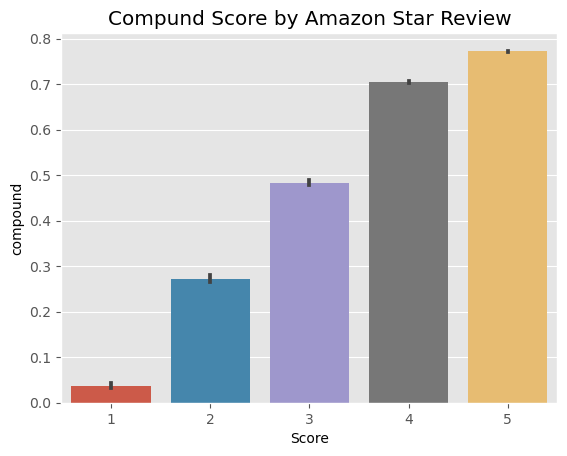

In [21]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

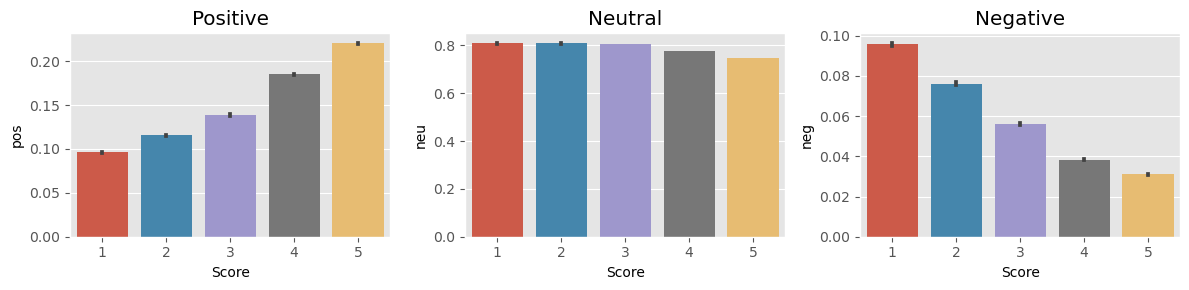

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Why ROBERTA PRETRAINED MODEL? VADERS model is good but very basic. It accounts for the words as it is and doesnt consider the relationship among the words. Many a times a word itself can be negative but its usage in a sentence can be sarcastic and actually very different. Roberta Model takes this into account and can pick up on the context in addition the actual word. Use a model trained of a large corpus of data. Transformer model accounts for the words but also the context related to other words.

Transformers is a popular natural language processing (NLP) library developed by Hugging Face. Hugging Face is an AI research organization and a company that focuses on making NLP models and tools accessible to the broader community. Transformers, their flagship library, provides easy-to-use APIs for working with state-of-the-art NLP models, including BERT, GPT-2, RoBERTa, and many others.

AutoTokenizers is a feature provided by the Hugging Face Transformers library to automatically select the appropriate tokenizer for a given pre-trained model.The idea behind AutoTokenizers is to make it easier for users to select the right tokenizer without having to explicitly specify it.

Sequence classification is a natural language processing (NLP) task that involves assigning a label or category to a sequence of text. AutoModelForSequenceClassification is a class provided by the Hugging Face Transformers library. It's designed for sequence classification tasks using various pre-trained transformer-based models.

Softmax is a mathematical function that is used to transform a vector of raw scores (also known as logits) into a probability distribution over multiple classes. The softmax function is applied element-wise to a vector, and it outputs a new vector where each element represents the probability of the corresponding class.

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# we take a pre trained model, its been trained on millions of tweets for sentinment analysis
# we take the tokenizer from the model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
# tokenize the example and store the tensoin encoded text
output = model(**encoded_text)
# run the model on the tokenized data
scores = output[0][0].detach().numpy()
#convert the tensor into a numpy array
scores = softmax(scores)
# softmax evens out the data such that the total sum is 1
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687481, 'roberta_pos': 0.0029573753}


In [ ]:
#earlier we applied the model to one text message
#convert it into a function - the function takes in a test message, tokenizes it and runs it through the pre trained model
#the output is then converted to a numpy library
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
# run the function for every row in the dataframe
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

COMPARE BETWEEN MODELS

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

REVIEW EXAMPLES
Positive and negative reviews with 1 to 5 start reviews

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]